In [1]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
(2919, 13)
<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotArea LotConfig BldgType  Overall

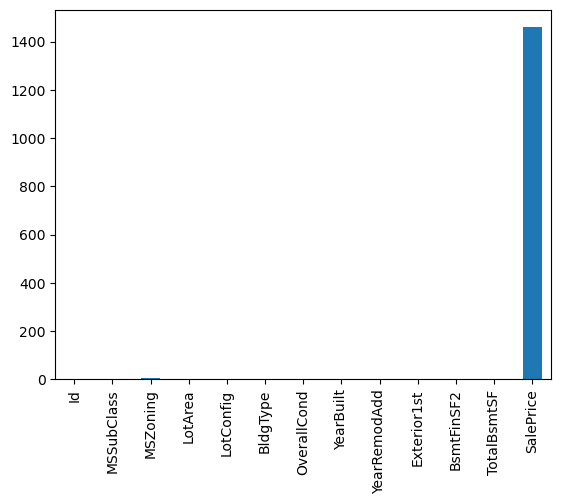

In [3]:
#Read Data files
df = pd.read_csv("/Users/trishasharma/Desktop/HousePricePrediction.xlsx - Sheet1.csv")
print(df.head())
print(df.shape)
print(df.info)
df.isnull().sum().plot.bar()
plt.show()

In [4]:
#cleaning
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype == np.float64:
        df[col] = df[col].fillna(df[col].mean())

print(df.isnull().sum().sum())


0


6 3 4
MSZoning  ------>  5
['RL' 'RM' 'C (all)' 'FV' 'RH']

LotConfig  ------>  5
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

BldgType  ------>  5
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Exterior1st  ------>  15
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']



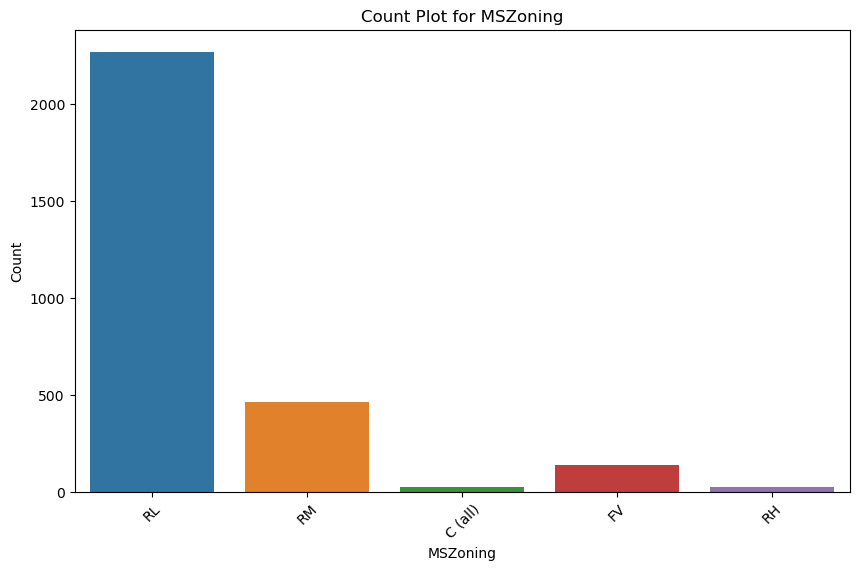

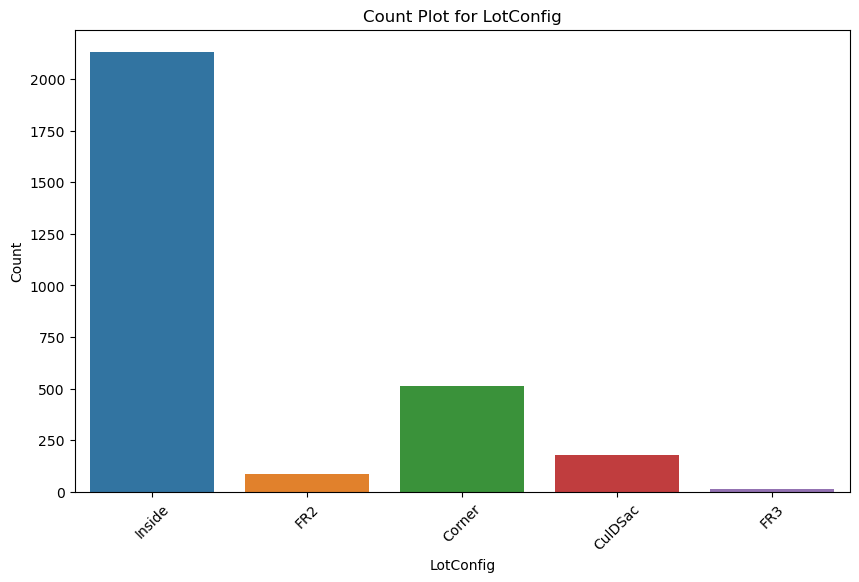

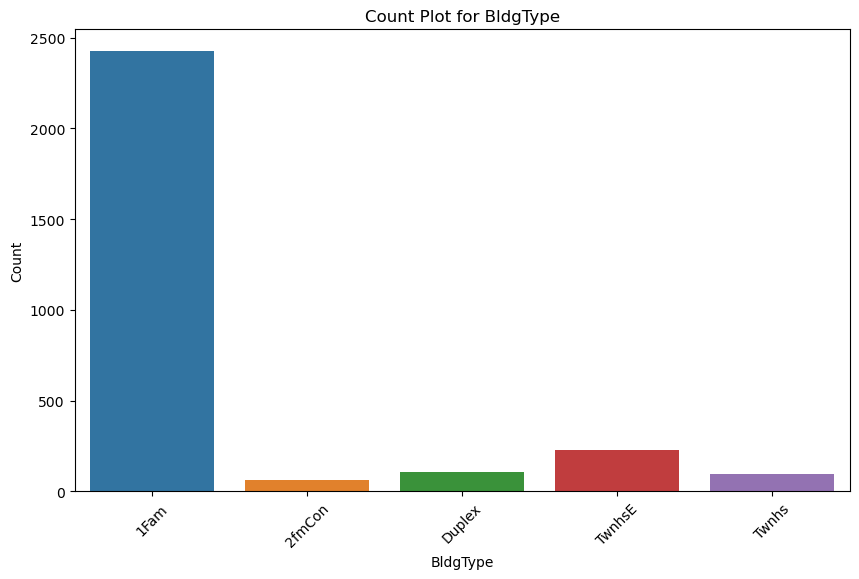

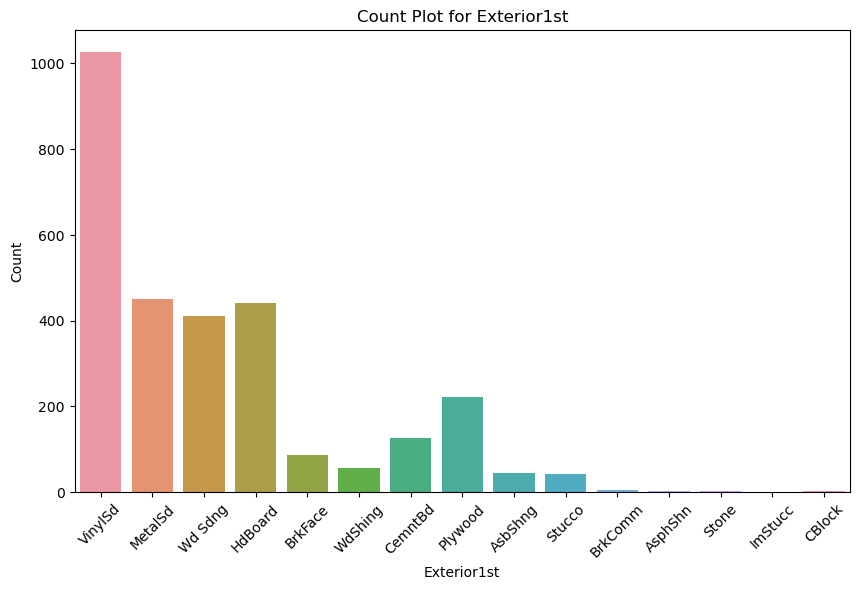

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


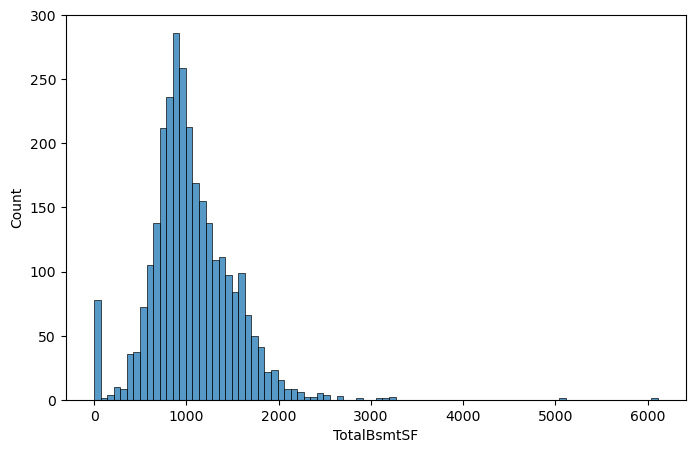

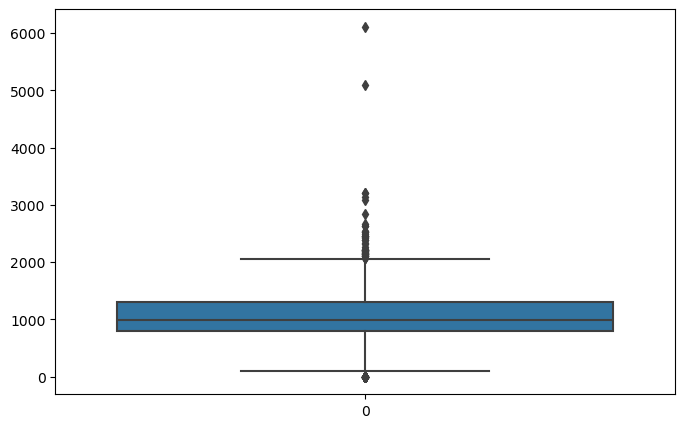

Shape of the dataframe before removal of outliers (2919, 13)
Shape of the dataframe after removal of outliers  (2861, 13)


In [5]:
#data analysis
ints, objects, floats = [], [], []

for col in df.columns:
    if df[col].dtype == float:
        floats.append(col)
    elif df[col].dtype == int:
        ints.append(col)
    else:
        objects.append(col)

print(len(ints), len(floats), len(objects))

for col in objects:
    print(col, ' ------> ', df[col].nunique())
    print(df[col].unique())
    print()
for col in objects: #plot for unique values
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plt.figure(figsize=(8, 5))#TotalBsmtSF coloumn to detect outliers
sns.histplot(df['TotalBsmtSF'])
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(df['TotalBsmtSF'])
plt.show()
print('Shape of the dataframe before removal of outliers', df.shape)
df = df[(df['TotalBsmtSF'] > -960) & (df['TotalBsmtSF'] < 2000)]
print('Shape of the dataframe after removal of outliers ', df.shape)

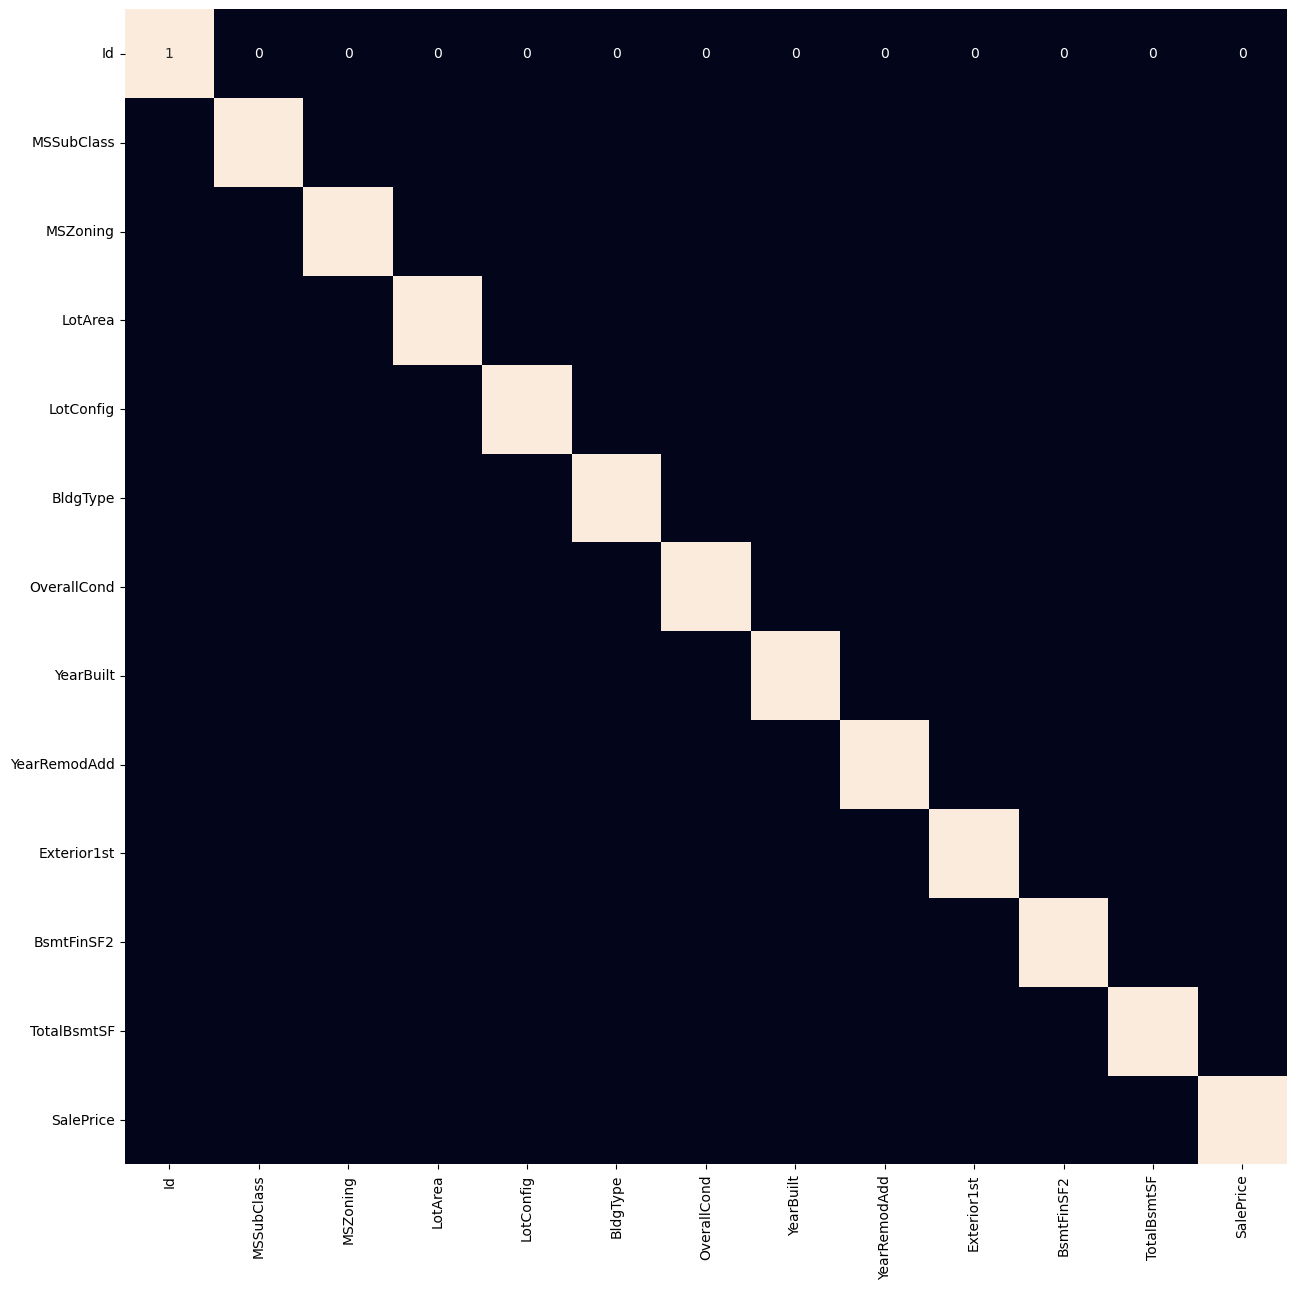

In [6]:
for col in objects:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()


In [8]:
features = df.drop(['SalePrice'], axis=1)
target = df['TotalBsmtSF'].values

X_train, X_val, \
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
print(X_train.shape, X_val.shape)


(2574, 12) (287, 12)


LinearRegression() : 
Training Error :  5.671533345700356e-13
Validation Error :  5.462513910038624e-13

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  0.7269548208622015
Validation Error :  3.1599396823382957

Lasso() : 
Training Error :  0.782249181278966
Validation Error :  0

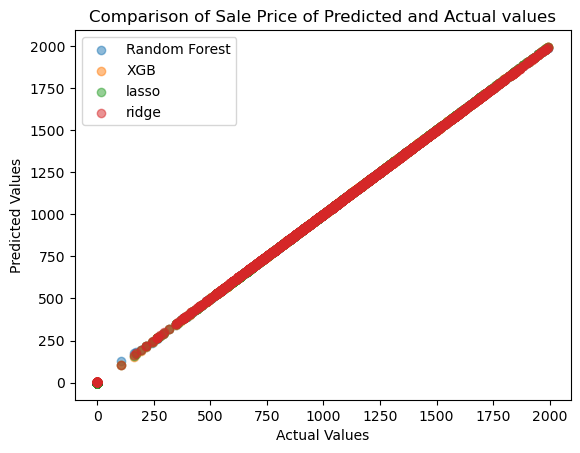

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
from sklearn.metrics import mean_absolute_error as mae

models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')

rf_model = models[3]  #RandomForestRegressor is at index 3
xgb_model = models[1]  #xgb model is at index 1
lasso_model = models[0] #lasso model is at index 1
ridge_model = models[2] #ridge model is at index 1

plt.scatter(Y_train, rf_model.predict(X_train), label='Random Forest', alpha=0.5)
plt.scatter(Y_train, xgb_model.predict(X_train), label='XGB', alpha=0.5)
plt.scatter(Y_train, lasso_model.predict(X_train), label='lasso', alpha=0.5)
plt.scatter(Y_train, ridge_model.predict(X_train), label='ridge', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()